# Practica 3
## Eduardo Leonel Sanchez Velasco
## NC: 420004035

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from random import randint as rand
from skimage import io
from math import ceil, floor
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

In [2]:
##Objetos y funciones globales necesarios
imagenes = {}
def get_histograma(img):
    img2 = img * 255
    y_space, x_space = img.shape
    tonalidades = dict.fromkeys(list(range(256)),0)
    for y in range(y_space):
        for x in range(x_space):
            tonalidades[img2[y][x]] += 1
    return tonalidades
def plot_img_histo(img,histograma):
    name, image = img
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.subplot(1,2,1)
    plt.title(name)
    plt.imshow(image)
    
    plt.subplot(1,2,2)
    plt.title(name)
    plt.bar(range(len(histograma)), list(histograma.values()), align='center',color = 'black')
    plt.show()
def plot_imgs_histos(img):
    name, imagenes = img
    sizes = (3,5,7,11)
    j = 0
    for img2 in imagenes:
        histograma = get_histograma(img2)
        plot_img_histo((name+' {}x{}'.format(sizes[j],sizes[j]),img2),histograma)
        j += 1
    

    
def gaussian_noise(img):
    img2 = img.copy() * 255
    noise = np.random.normal(0, 50, img2.shape) 
    img_noised = img2 + noise
    img_noised = np.clip(img_noised, 0, 255)
    return np.rint(img_noised)/255

def salt_pepper_noise(img):
    img2 = img.copy() *255
    y_space, x_space = img.shape
    pepper = 0.005
    salt = 1 - pepper
    for y in range(y_space):
        for x in range(x_space):
            rdn = np.random.random()
            if rdn < pepper:
                img2[y][x] = 0
            elif rdn > salt:
                img2[y][x] = 1
    return img2/255

In [3]:
def convolution(section, filter):
    convol = np.multiply(section,filter)
    return abs(convol.sum()) 
    

def apply_filter(img,filter):
    fileter_size = filter.shape[0]
    padding = fileter_size // 2
    img2 = img.copy() * 255
    img3 = np.pad(img2, pad_width=padding, mode='constant', constant_values=0)
    y_space, x_space = img3.shape
    for y in range(padding,y_space-padding):
        for x in range(padding,x_space-padding):
            section = img3[y-padding:y+fileter_size-padding, x-padding:x+fileter_size-padding]
            img2[y-padding][x-padding] = convolution(section,filter)
    return np.clip(np.rint(img2),0,255)/255

In [4]:
def make_filter(shape):
    return np.ones(shape)
def make_filter_p(shape):
    filter =  np.ones(shape)
    y_space, x_space = shape
    y_aux, x_aux = y_space-1, x_space-1
    y_2 = y_aux
    aux = y_space//2 
    for y in range(y_space):
        x_aux = x_space-1
        x_2 = x_aux
        for x in range(x_space):
            filter[y][x] = 2**(y_aux - np.clip(y_2,0,y_space)) * 2**(x_aux - np.clip(x_2,0,x_space)) 
            x_aux -= 1
            x_2 -= 2
        y_aux -= 1
        y_2 -=2
    return filter   

In [5]:
def mediana(section):
    lista = section.flatten()
    return np.median(lista)
    
def filtro_mediana(img,size):
    padding = size // 2
    img2 = img.copy() * 255
    img3 = np.pad(img2, pad_width=padding, mode='constant', constant_values=0)
    y_space, x_space = img3.shape
    for y in range(padding,y_space-padding):
        for x in range(padding,x_space-padding):
            section = img3[y-padding:y+size-padding, x-padding:x+size-padding]
            img2[y-padding][x-padding] = mediana(section)
    return np.rint(img2)/255

In [6]:
rm=io.imread('images/ImagenFourier.png')/255
imagenes['ImagenFourier'] = rm
rm=io.imread('images/brain.tif')/255
imagenes['Brain'] = rm
rm=io.imread('images/granos.png')/255
imagenes['Granos'] = rm
rm=io.imread('images/lena.tiff')/255
imagenes['Lena'] = rm
rm=io.imread('images/mamografia.tif')/255
imagenes['Mamografia'] = rm
rm=io.imread('images/resonancia.tif')/255
imagenes['Resonancia'] = rm
rm=io.imread('images/tungsten_1.jpg')/255
imagenes['Tungsten1'] = rm
rm=io.imread('images/tungsten_2.jpg')/255
imagenes['Tungsten2'] = rm

In [7]:
imagenes_ruido_g = imagenes.copy()
for img in imagenes_ruido_g:
    imagenes_ruido_g[img] = gaussian_noise(imagenes_ruido_g[img])

In [8]:
imagenes_ruido_sp = imagenes.copy()
for img in imagenes_ruido_sp:
    imagenes_ruido_sp[img] = gaussian_noise(imagenes_ruido_sp[img])

In [9]:
filtro_prewit_x = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
filtro_prewit_x

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [10]:
filtro_prewit_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
filtro_prewit_y

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [11]:
filtro_sobel_x = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
filtro_sobel_x

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [12]:
filtro_sobel_y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtro_sobel_y

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [13]:
imagenes_sin_ruido_prewitt_x= imagenes.copy()
for img in imagenes_sin_ruido_prewitt_x:  
    imagenes_sin_ruido_prewitt_x[img] = apply_filter(imagenes_sin_ruido_prewitt_x[img],filtro_prewit_x)        

In [14]:
imagenes_sin_ruido_prewitt_y= imagenes.copy()
for img in imagenes_sin_ruido_prewitt_y:  
    imagenes_sin_ruido_prewitt_y[img] = apply_filter(imagenes_sin_ruido_prewitt_y[img],filtro_prewit_y)  

In [15]:
imagenes_sin_ruido_sobel_x= imagenes.copy()
for img in imagenes_sin_ruido_sobel_x:  
    imagenes_sin_ruido_sobel_x[img] = apply_filter(imagenes_sin_ruido_sobel_x[img],filtro_sobel_x)  

In [16]:
imagenes_sin_ruido_sobel_y= imagenes.copy()
for img in imagenes_sin_ruido_sobel_y:  
    imagenes_sin_ruido_sobel_y[img] = apply_filter(imagenes_sin_ruido_sobel_y[img],filtro_sobel_y)  

Imagen prewitt x


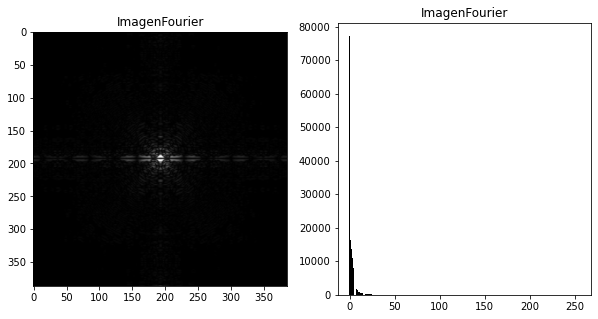

Imagen prewitt y


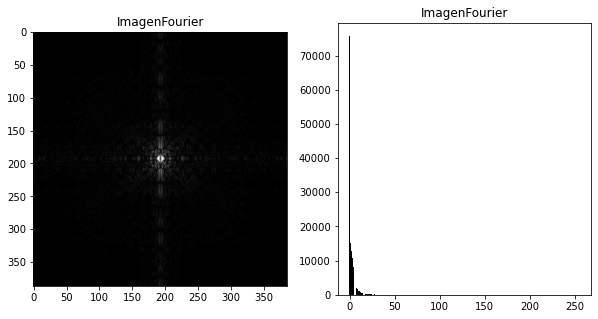

Imagen prewitt x


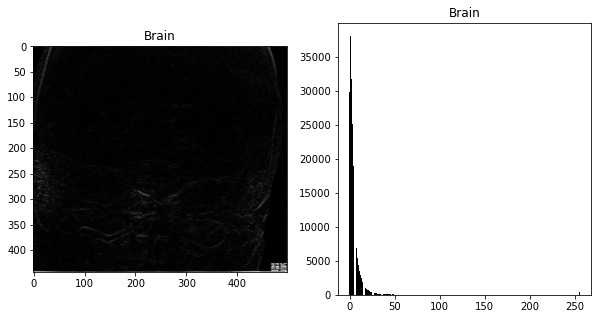

Imagen prewitt y


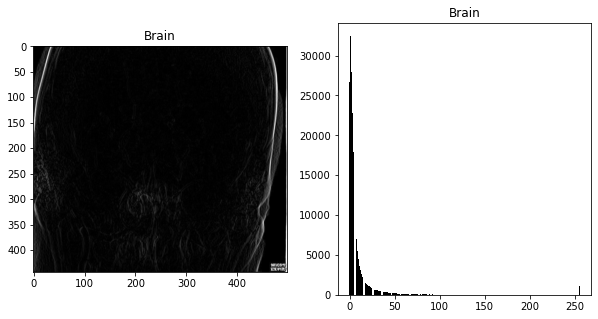

Imagen prewitt x


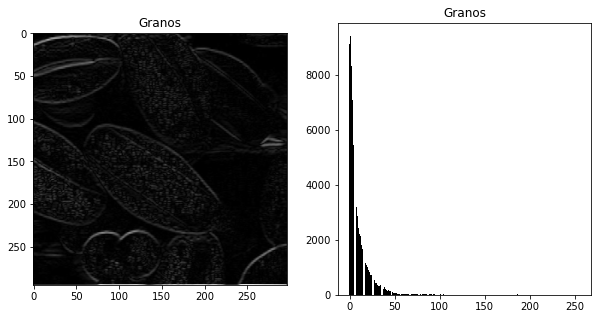

Imagen prewitt y


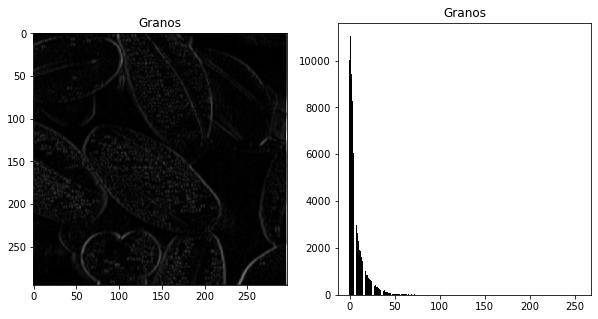

Imagen prewitt x


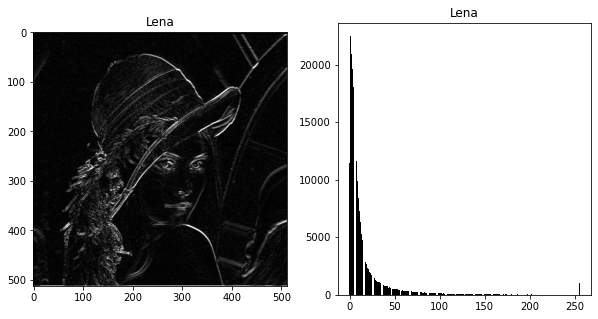

Imagen prewitt y


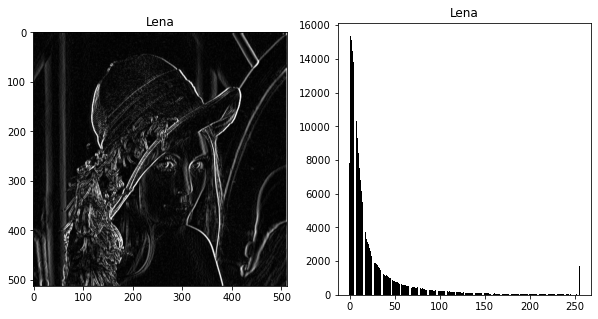

Imagen prewitt x


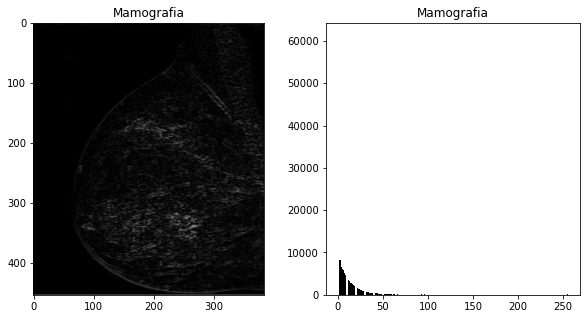

Imagen prewitt y


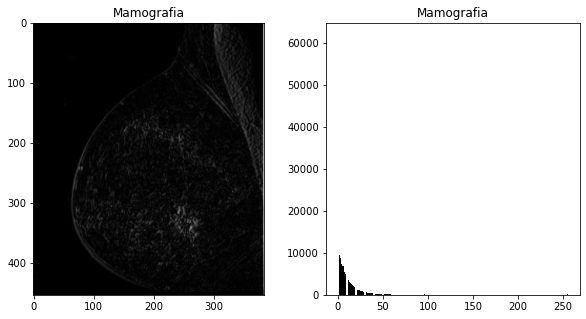

Imagen prewitt x


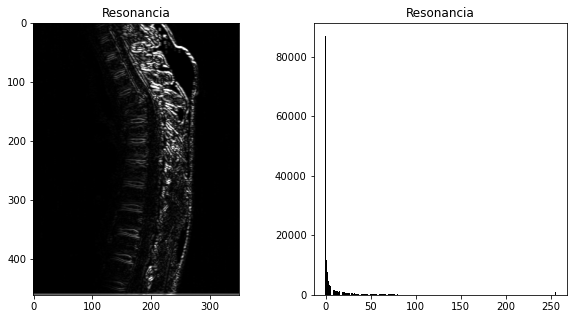

Imagen prewitt y


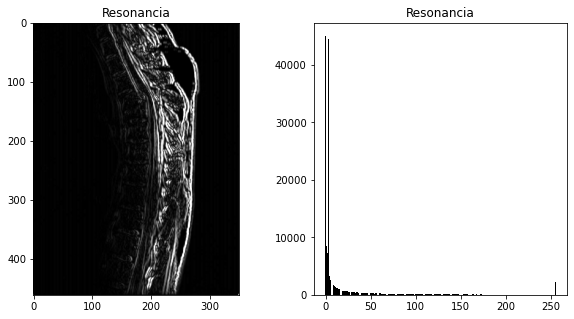

Imagen prewitt x


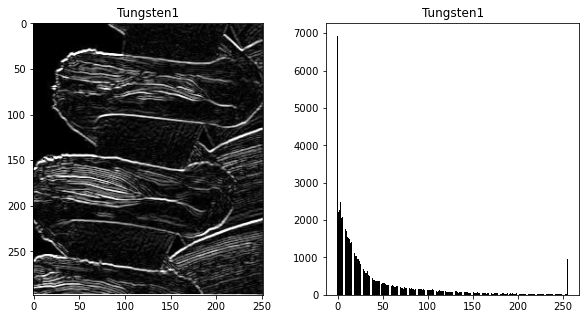

Imagen prewitt y


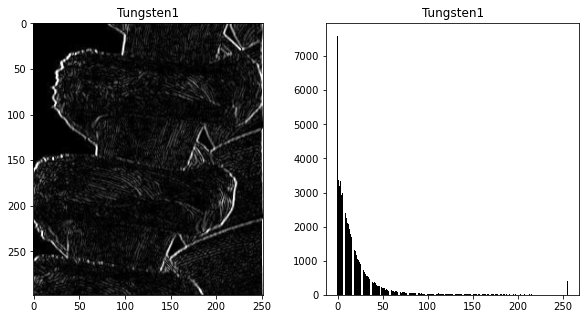

Imagen prewitt x


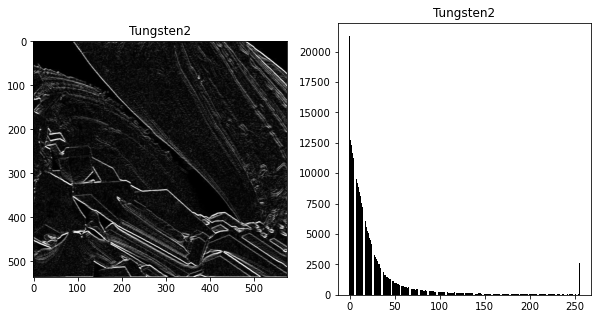

Imagen prewitt y


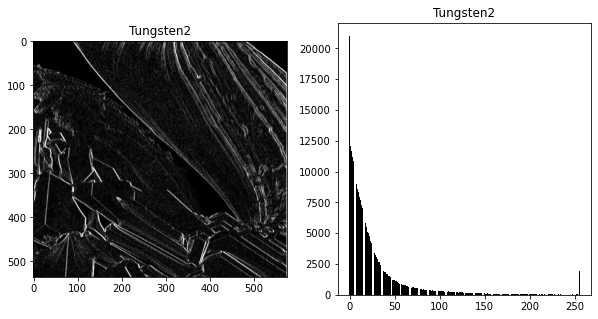

In [17]:
for img in imagenes:
    print('Imagen prewitt x')
    plot_img_histo((img,imagenes_sin_ruido_prewitt_x[img]),get_histograma(imagenes_sin_ruido_prewitt_x[img]))
    print('Imagen prewitt y')
    plot_img_histo((img,imagenes_sin_ruido_prewitt_y[img]),get_histograma(imagenes_sin_ruido_prewitt_y[img]))

Imagen sobel x


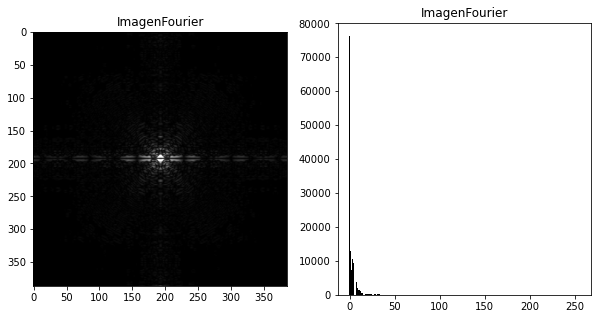

Imagen sobel y


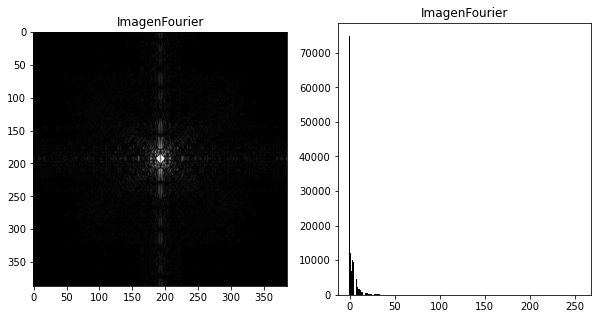

Imagen sobel x


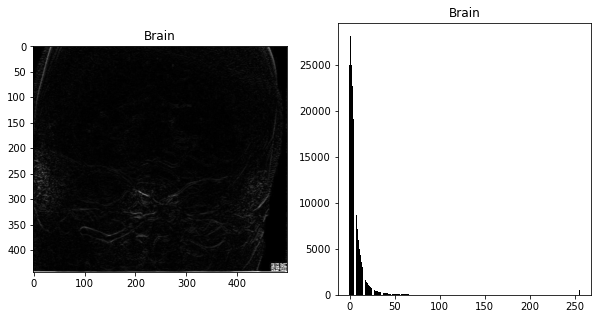

Imagen sobel y


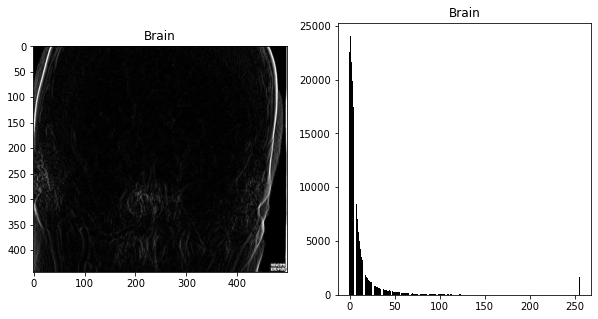

Imagen sobel x


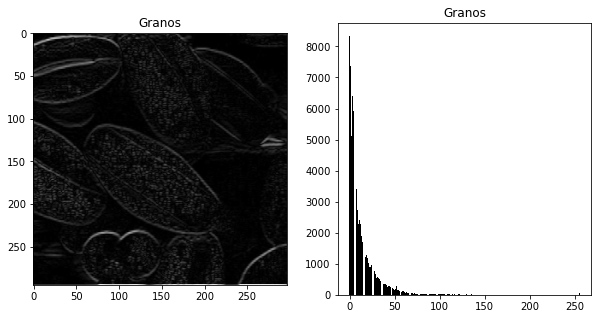

Imagen sobel y


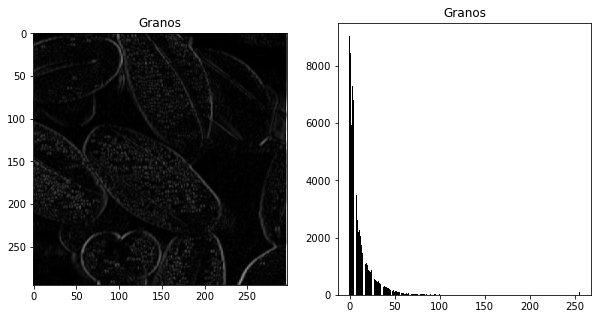

Imagen sobel x


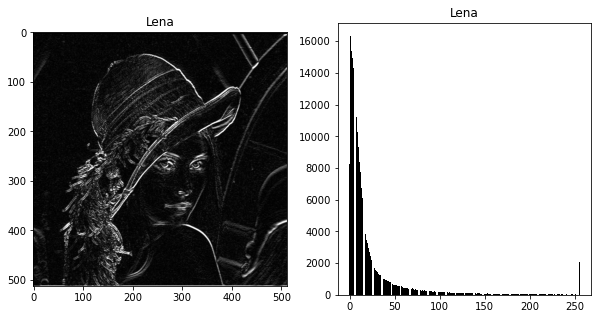

Imagen sobel y


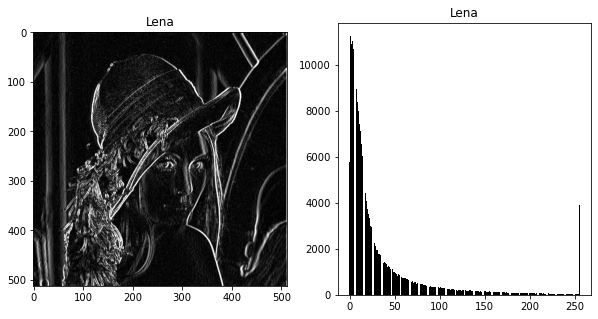

Imagen sobel x


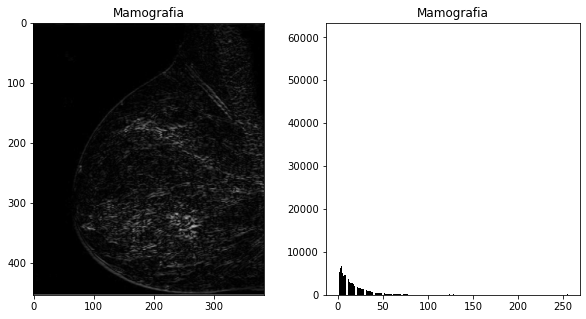

Imagen sobel y


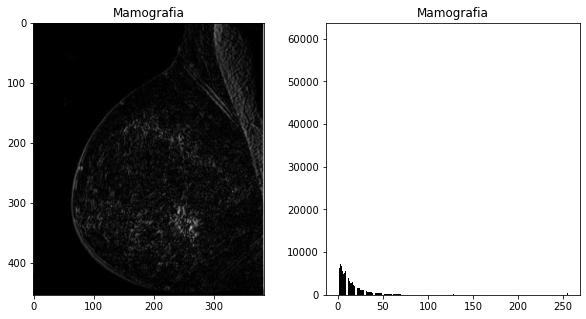

Imagen sobel x


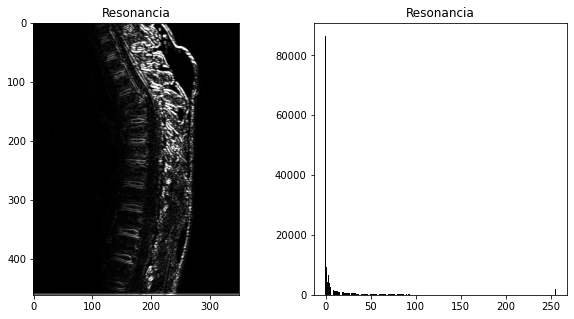

Imagen sobel y


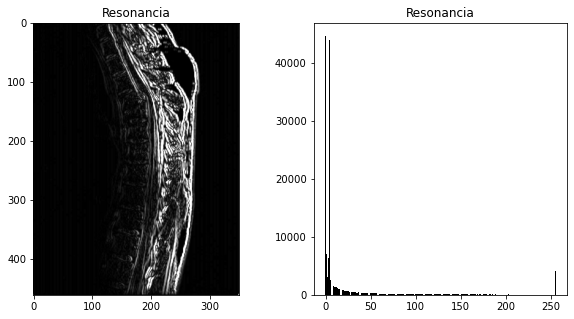

Imagen sobel x


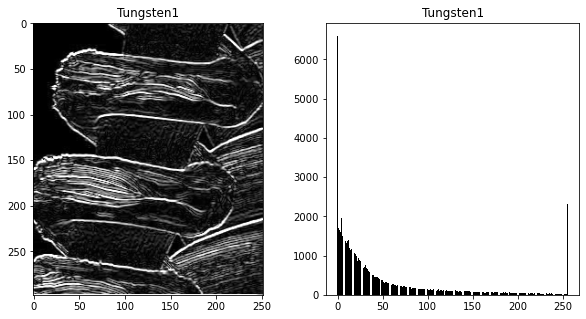

Imagen sobel y


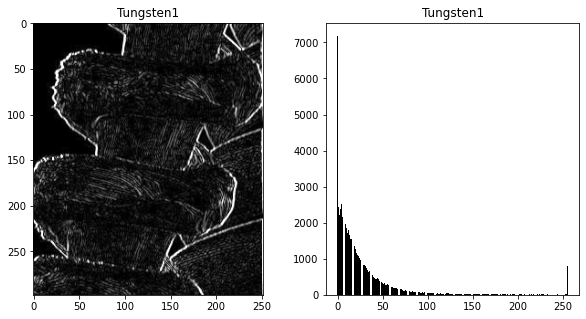

Imagen sobel x


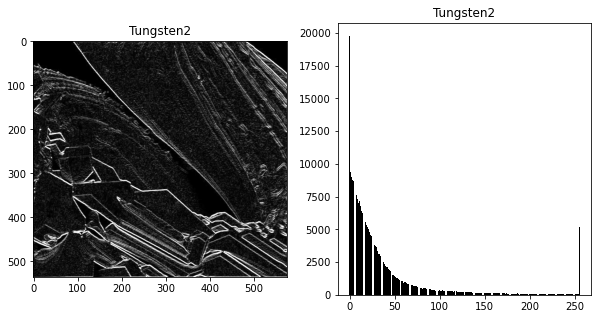

Imagen sobel y


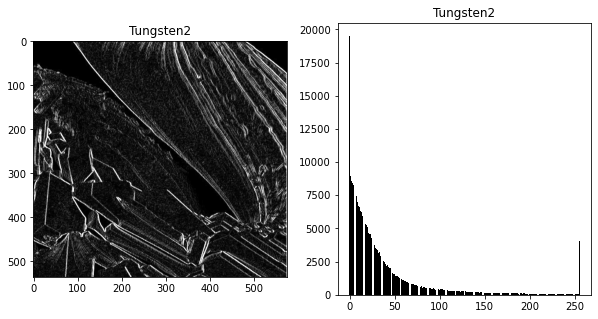

In [18]:
for img in imagenes:
    print('Imagen sobel x')
    plot_img_histo((img,imagenes_sin_ruido_sobel_x[img]),get_histograma(imagenes_sin_ruido_sobel_x[img]))
    print('Imagen sobel y')
    plot_img_histo((img,imagenes_sin_ruido_sobel_y[img]),get_histograma(imagenes_sin_ruido_sobel_y[img]))

In [19]:
imagenes_sin_ruido_prewitt= imagenes.copy()
for img in imagenes_sin_ruido_prewitt:  
    img2 = np.add(imagenes_sin_ruido_prewitt_x[img]*255,imagenes_sin_ruido_prewitt_y[img]*255)
    imagenes_sin_ruido_prewitt[img] = np.clip(img2,0,255)/255

In [20]:
imagenes_sin_ruido_sobel= imagenes.copy()
for img in imagenes_sin_ruido_sobel:  
    img2 = np.add(imagenes_sin_ruido_sobel_x[img] *255,imagenes_sin_ruido_sobel_y[img]*255)
    imagenes_sin_ruido_sobel[img] = np.clip(img2,0,255)/255

Imagen prewitt


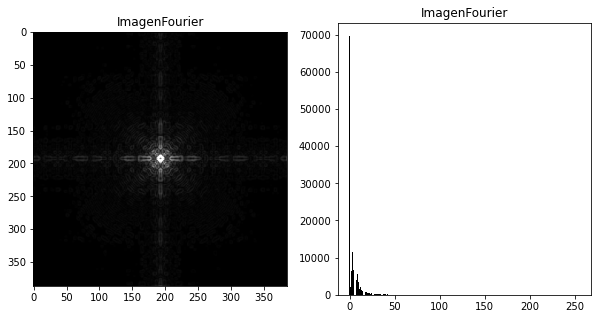

Imagen sobel


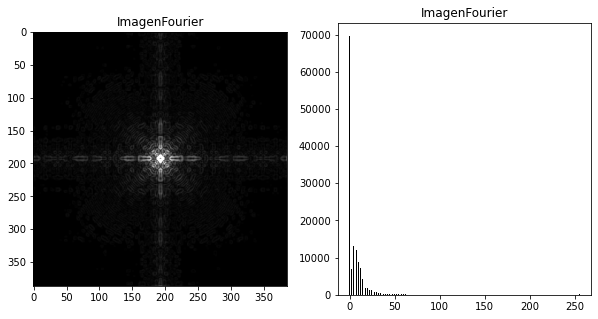

Imagen prewitt


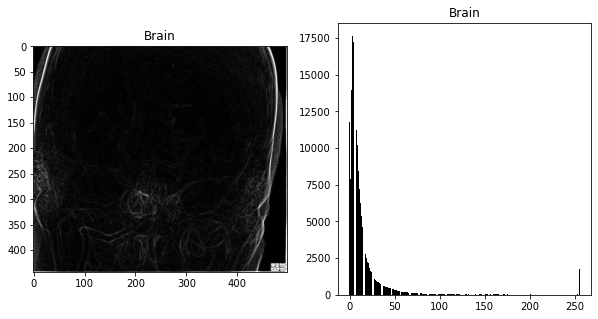

Imagen sobel


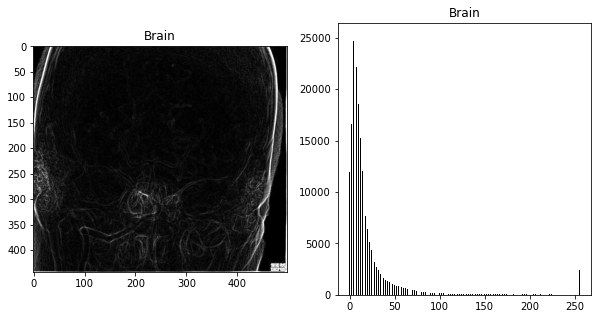

Imagen prewitt


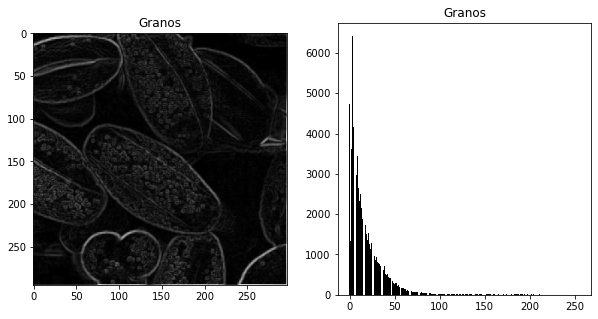

Imagen sobel


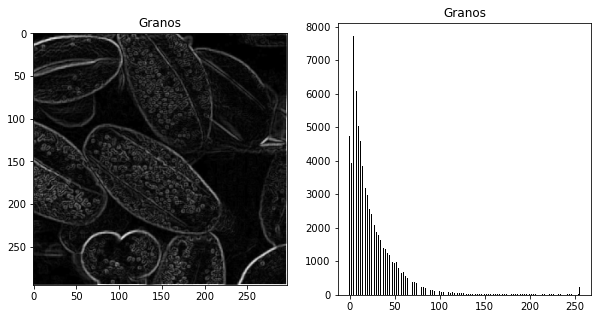

Imagen prewitt


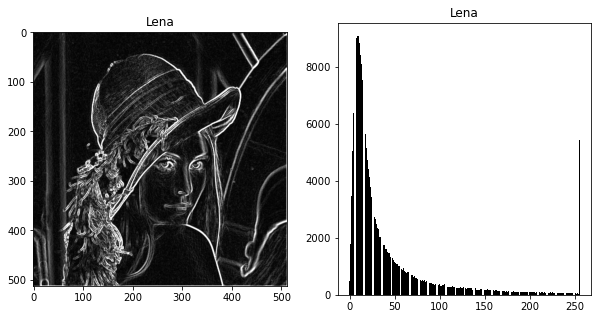

Imagen sobel


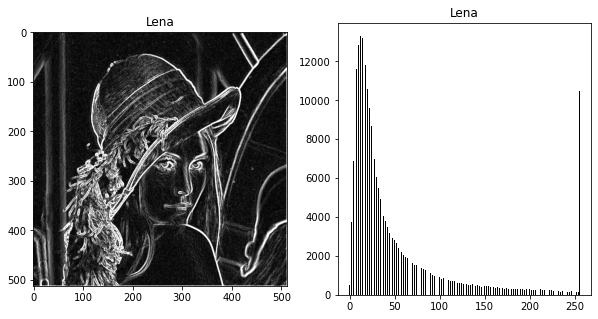

Imagen prewitt


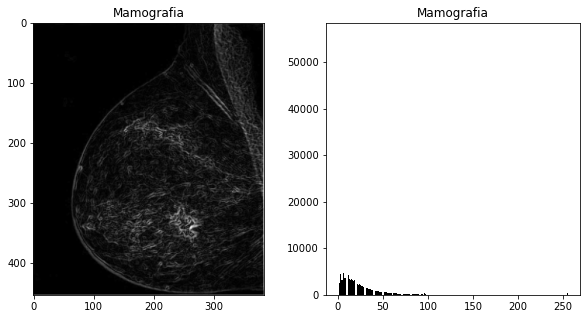

Imagen sobel


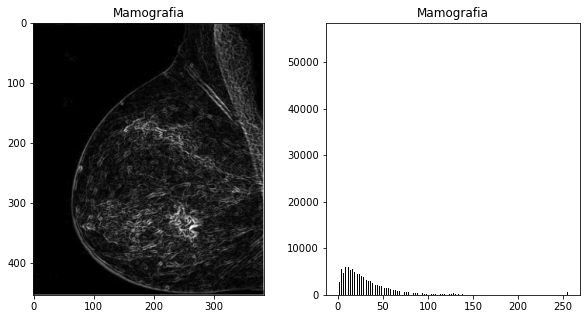

Imagen prewitt


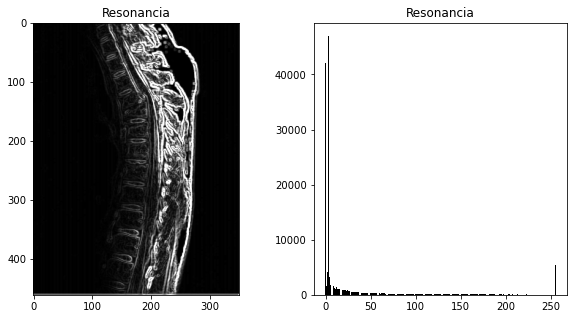

Imagen sobel


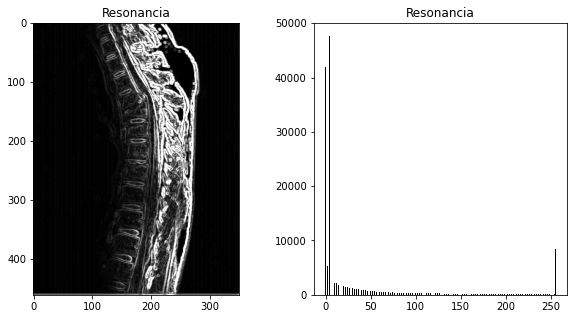

Imagen prewitt


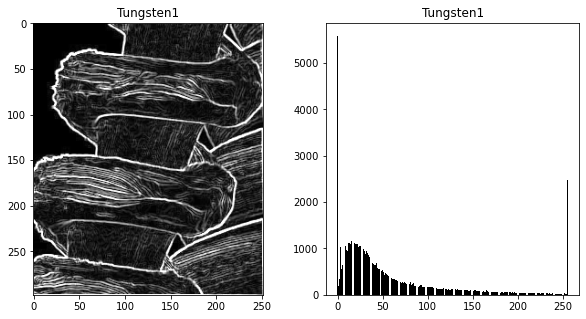

Imagen sobel


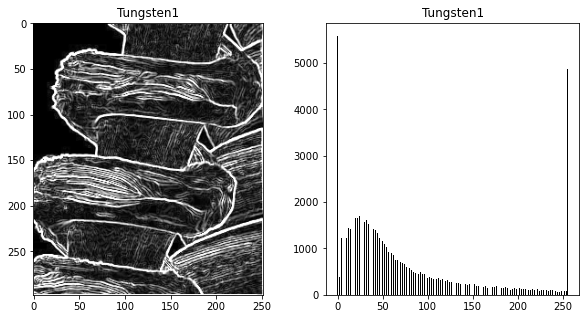

Imagen prewitt


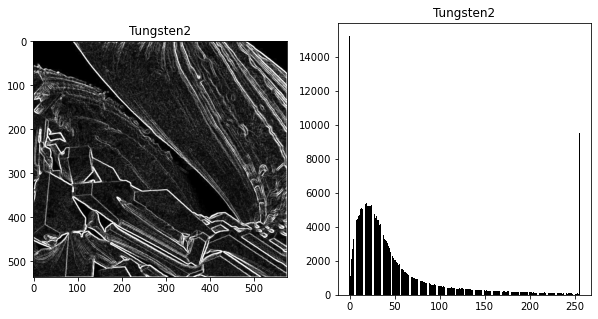

Imagen sobel


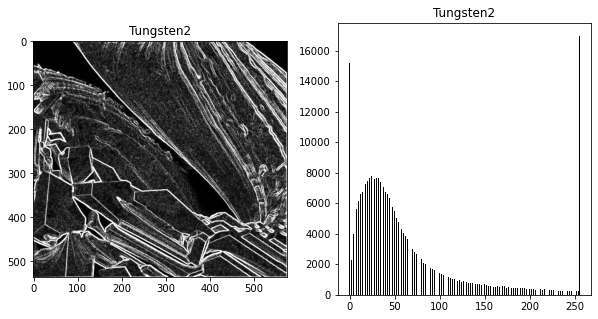

In [21]:
for img in imagenes:
    print('Imagen prewitt')
    plot_img_histo((img,imagenes_sin_ruido_prewitt[img]),get_histograma(imagenes_sin_ruido_prewitt[img]))
    print('Imagen sobel')
    plot_img_histo((img,imagenes_sin_ruido_sobel[img]),get_histograma(imagenes_sin_ruido_sobel[img]))

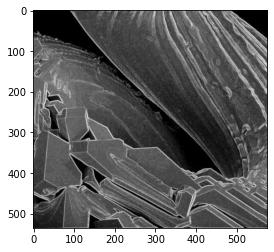

In [22]:
imgtugstenprewitt = np.clip(np.add(imagenes_sin_ruido_prewitt['Tungsten2'],imagenes['Tungsten2']),0,255)
plt.imshow(imgtugstenprewitt)

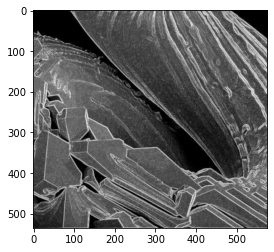

In [23]:
imgtugstensobel = np.clip(np.add(imagenes_sin_ruido_sobel['Tungsten2'],imagenes['Tungsten2']),0,255)
plt.imshow(imgtugstensobel)

In [25]:
plt.imsave('resultados/tugsteno2prewitt.jpg',imgtugstenprewitt)
plt.imsave('resultados/tugsteno2sobel.jpg',imgtugstensobel)
